In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['framingham_preprocessed.csv', '.DS_Store', 'framingham_preprocessed.zip', 'heart.csv', 'Heart_disease_prediction.ipynb', 'Heart disease prediction.ipynb', 'framingham.csv', '.ipynb_checkpoints']


In [93]:
#Loading the dataset
dataset = pd.read_csv("framingham_preprocessed.csv")

In [94]:
#Checking the dimensions of the dataset
dataset.shape

(4133, 16)

In [138]:
#Printing a few columns
dataset.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [96]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("TenYearCHD",axis=1)
target = dataset["TenYearCHD"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [97]:
X_train.shape

(3306, 15)

In [98]:
X_test.shape

(827, 15)

In [99]:
#Logistic Regression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred_lr = lr.predict(X_test)

In [100]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 84.76 %


In [101]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)
Y_pred_nb = nb.predict(X_test)
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)
print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 82.95 %


In [102]:
#SVM
from sklearn import svm
sv = svm.SVC(kernel='linear')
sv.fit(X_train, Y_train)
Y_pred_svm = sv.predict(X_test)
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 84.76 %


In [103]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 83.8 %


In [104]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
max_accuracy = 0
for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x        
#print(max_accuracy)
#print(best_x)
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 77.99 %


In [105]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
max_accuracy = 0
for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
#print(max_accuracy)
#print(best_x)
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 85.85 %


In [106]:
#XGBoost
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)
Y_pred_xgb = xgb_model.predict(X_test)
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)
print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 83.07 %


In [107]:
#Neural network
from keras.models import Sequential
from keras.layers import Dense

In [108]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=15))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [109]:
model.fit(X_train,Y_train,epochs=2000)

Epoch 1/2000
104/104 [==============================] - 3s 2ms/step - loss: 12.6051 - accuracy: 0.5977
Epoch 2/2000
104/104 [==============================] - 0s 1ms/step - loss: 1.3493 - accuracy: 0.7641
Epoch 3/2000
104/104 [==============================] - 0s 3ms/step - loss: 1.0139 - accuracy: 0.7740
Epoch 4/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.7494 - accuracy: 0.7973
Epoch 5/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.6316 - accuracy: 0.8085
Epoch 6/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.5773 - accuracy: 0.8088
Epoch 7/2000
104/104 [==============================] - 0s 2ms/step - loss: 0.5397 - accuracy: 0.8170
Epoch 8/2000
104/104 [==============================] - 0s 3ms/step - loss: 0.5326 - accuracy: 0.8131
Epoch 9/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.5231 - accuracy: 0.8188
Epoch 10/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.48

104/104 [==============================] - 0s 1ms/step - loss: 0.4204 - accuracy: 0.8442
Epoch 159/2000
104/104 [==============================] - 0s 982us/step - loss: 0.4031 - accuracy: 0.8491
Epoch 160/2000
104/104 [==============================] - 0s 997us/step - loss: 0.4316 - accuracy: 0.8318
Epoch 161/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.4097 - accuracy: 0.8436
Epoch 162/2000
104/104 [==============================] - 0s 983us/step - loss: 0.4085 - accuracy: 0.8469
Epoch 163/2000
104/104 [==============================] - 0s 993us/step - loss: 0.4242 - accuracy: 0.8427
Epoch 164/2000
104/104 [==============================] - 0s 970us/step - loss: 0.4401 - accuracy: 0.8339
Epoch 165/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.4248 - accuracy: 0.8409
Epoch 166/2000
104/104 [==============================] - 0s 3ms/step - loss: 0.4255 - accuracy: 0.8418
Epoch 167/2000
104/104 [==============================] - 0s 1ms/step

104/104 [==============================] - 0s 3ms/step - loss: 0.4035 - accuracy: 0.8503
Epoch 237/2000
104/104 [==============================] - 0s 2ms/step - loss: 0.4271 - accuracy: 0.8427
Epoch 238/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.4025 - accuracy: 0.8512
Epoch 239/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.4103 - accuracy: 0.8466
Epoch 240/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.4140 - accuracy: 0.8430
Epoch 241/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.4054 - accuracy: 0.8448
Epoch 242/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.4058 - accuracy: 0.8412
Epoch 243/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.4067 - accuracy: 0.8406
Epoch 244/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.4142 - accuracy: 0.8494
Epoch 245/2000
104/104 [==============================] - 0s 1ms/step - loss: 0

104/104 [==============================] - 0s 1ms/step - loss: 0.4086 - accuracy: 0.8436
Epoch 393/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.4077 - accuracy: 0.8448
Epoch 394/2000
104/104 [==============================] - 0s 2ms/step - loss: 0.3972 - accuracy: 0.8475
Epoch 395/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.4102 - accuracy: 0.8479
Epoch 396/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.4197 - accuracy: 0.8445
Epoch 397/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3948 - accuracy: 0.8515
Epoch 398/2000
104/104 [==============================] - 0s 984us/step - loss: 0.3907 - accuracy: 0.8491
Epoch 399/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.4084 - accuracy: 0.8475
Epoch 400/2000
104/104 [==============================] - 0s 979us/step - loss: 0.3943 - accuracy: 0.8485
Epoch 401/2000
104/104 [==============================] - 0s 1ms/step - los

104/104 [==============================] - 0s 1ms/step - loss: 0.4048 - accuracy: 0.8442
Epoch 549/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.4087 - accuracy: 0.8418
Epoch 550/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3996 - accuracy: 0.8448
Epoch 551/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.4177 - accuracy: 0.8415
Epoch 552/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3928 - accuracy: 0.8503
Epoch 553/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.4114 - accuracy: 0.8430
Epoch 554/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3999 - accuracy: 0.8448
Epoch 555/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.8397
Epoch 556/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3984 - accuracy: 0.8469
Epoch 557/2000
104/104 [==============================] - 0s 1ms/step - loss: 0

104/104 [==============================] - 0s 1ms/step - loss: 0.4032 - accuracy: 0.8463
Epoch 705/2000
104/104 [==============================] - 0s 965us/step - loss: 0.4066 - accuracy: 0.8448
Epoch 706/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.4025 - accuracy: 0.8475
Epoch 707/2000
104/104 [==============================] - 0s 998us/step - loss: 0.3886 - accuracy: 0.8482
Epoch 708/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3903 - accuracy: 0.8509
Epoch 709/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3937 - accuracy: 0.8472
Epoch 710/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3879 - accuracy: 0.8488
Epoch 711/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3910 - accuracy: 0.8475
Epoch 712/2000
104/104 [==============================] - 0s 966us/step - loss: 0.4032 - accuracy: 0.8479
Epoch 713/2000
104/104 [==============================] - 0s 1ms/step - l

104/104 [==============================] - 0s 1ms/step - loss: 0.3926 - accuracy: 0.8497
Epoch 861/2000
104/104 [==============================] - 0s 2ms/step - loss: 0.3916 - accuracy: 0.8491
Epoch 862/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3989 - accuracy: 0.8463
Epoch 863/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3878 - accuracy: 0.8551
Epoch 864/2000
104/104 [==============================] - 0s 992us/step - loss: 0.3930 - accuracy: 0.8494
Epoch 865/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.4026 - accuracy: 0.8494
Epoch 866/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.4091 - accuracy: 0.8406
Epoch 867/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3856 - accuracy: 0.8503
Epoch 868/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3826 - accuracy: 0.8515
Epoch 869/2000
104/104 [==============================] - 0s 1ms/step - loss:

104/104 [==============================] - 0s 1ms/step - loss: 0.4034 - accuracy: 0.8485
Epoch 1017/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3869 - accuracy: 0.8515
Epoch 1018/2000
104/104 [==============================] - 0s 982us/step - loss: 0.3813 - accuracy: 0.8536
Epoch 1019/2000
104/104 [==============================] - 0s 966us/step - loss: 0.3930 - accuracy: 0.8503
Epoch 1020/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3857 - accuracy: 0.8518
Epoch 1021/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3954 - accuracy: 0.8512
Epoch 1022/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3892 - accuracy: 0.8500
Epoch 1023/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3855 - accuracy: 0.8533
Epoch 1024/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3880 - accuracy: 0.8521
Epoch 1025/2000
104/104 [==============================] - 0s 1ms/s

104/104 [==============================] - 0s 1ms/step - loss: 0.4062 - accuracy: 0.8472
Epoch 1171/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3850 - accuracy: 0.8533
Epoch 1172/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3901 - accuracy: 0.8521
Epoch 1173/2000
104/104 [==============================] - 0s 986us/step - loss: 0.3904 - accuracy: 0.8500
Epoch 1174/2000
104/104 [==============================] - 0s 984us/step - loss: 0.3889 - accuracy: 0.8527
Epoch 1175/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3851 - accuracy: 0.8524
Epoch 1176/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3843 - accuracy: 0.8524
Epoch 1177/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3932 - accuracy: 0.8475
Epoch 1178/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3825 - accuracy: 0.8515
Epoch 1179/2000
104/104 [==============================] - 0s 1ms/s

Epoch 1248/2000
104/104 [==============================] - 0s 977us/step - loss: 0.3897 - accuracy: 0.8515
Epoch 1249/2000
104/104 [==============================] - 0s 976us/step - loss: 0.3846 - accuracy: 0.8560
Epoch 1250/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3936 - accuracy: 0.8494
Epoch 1251/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3888 - accuracy: 0.8527
Epoch 1252/2000
104/104 [==============================] - 0s 957us/step - loss: 0.3978 - accuracy: 0.8472
Epoch 1253/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3841 - accuracy: 0.8536
Epoch 1254/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3831 - accuracy: 0.8530
Epoch 1255/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3943 - accuracy: 0.8479
Epoch 1256/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3852 - accuracy: 0.8515
Epoch 1257/2000
104/104 [========================

104/104 [==============================] - 0s 1ms/step - loss: 0.3836 - accuracy: 0.8542
Epoch 1403/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3793 - accuracy: 0.8560
Epoch 1404/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3842 - accuracy: 0.8536
Epoch 1405/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3857 - accuracy: 0.8521
Epoch 1406/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3836 - accuracy: 0.8533
Epoch 1407/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3808 - accuracy: 0.8524
Epoch 1408/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3827 - accuracy: 0.8545
Epoch 1409/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3876 - accuracy: 0.8506
Epoch 1410/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3844 - accuracy: 0.8548
Epoch 1411/2000
104/104 [==============================] - 0s 1ms/step 

104/104 [==============================] - 0s 1ms/step - loss: 0.3805 - accuracy: 0.8521
Epoch 1481/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3877 - accuracy: 0.8509
Epoch 1482/2000
104/104 [==============================] - 0s 2ms/step - loss: 0.3865 - accuracy: 0.8506
Epoch 1483/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3788 - accuracy: 0.8527
Epoch 1484/2000
104/104 [==============================] - 0s 966us/step - loss: 0.3769 - accuracy: 0.8551
Epoch 1485/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3850 - accuracy: 0.8530
Epoch 1486/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3859 - accuracy: 0.8524
Epoch 1487/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3839 - accuracy: 0.8527
Epoch 1488/2000
104/104 [==============================] - 0s 3ms/step - loss: 0.3820 - accuracy: 0.8542
Epoch 1489/2000
104/104 [==============================] - 0s 2ms/ste

Epoch 1558/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3782 - accuracy: 0.8557
Epoch 1559/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3819 - accuracy: 0.8545
Epoch 1560/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3785 - accuracy: 0.8542
Epoch 1561/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3833 - accuracy: 0.8536
Epoch 1562/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3819 - accuracy: 0.8524
Epoch 1563/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3792 - accuracy: 0.8551
Epoch 1564/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3802 - accuracy: 0.8560
Epoch 1565/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3827 - accuracy: 0.8539
Epoch 1566/2000
104/104 [==============================] - 0s 976us/step - loss: 0.3833 - accuracy: 0.8533
Epoch 1567/2000
104/104 [============================

104/104 [==============================] - 0s 1ms/step - loss: 0.3826 - accuracy: 0.8542
Epoch 1713/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3796 - accuracy: 0.8533
Epoch 1714/2000
104/104 [==============================] - 0s 978us/step - loss: 0.3904 - accuracy: 0.8515
Epoch 1715/2000
104/104 [==============================] - 0s 1000us/step - loss: 0.3829 - accuracy: 0.8560
Epoch 1716/2000
104/104 [==============================] - 0s 971us/step - loss: 0.3799 - accuracy: 0.8545
Epoch 1717/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3809 - accuracy: 0.8542
Epoch 1718/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3818 - accuracy: 0.8533
Epoch 1719/2000
104/104 [==============================] - 0s 981us/step - loss: 0.3782 - accuracy: 0.8542
Epoch 1720/2000
104/104 [==============================] - 0s 959us/step - loss: 0.3803 - accuracy: 0.8530
Epoch 1721/2000
104/104 [==============================] - 0

104/104 [==============================] - 0s 1ms/step - loss: 0.3758 - accuracy: 0.8554
Epoch 1867/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3783 - accuracy: 0.8563
Epoch 1868/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3793 - accuracy: 0.8539
Epoch 1869/2000
104/104 [==============================] - 0s 963us/step - loss: 0.3835 - accuracy: 0.8551
Epoch 1870/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3794 - accuracy: 0.8542
Epoch 1871/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3836 - accuracy: 0.8533
Epoch 1872/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3778 - accuracy: 0.8575
Epoch 1873/2000
104/104 [==============================] - 0s 978us/step - loss: 0.3765 - accuracy: 0.8560
Epoch 1874/2000
104/104 [==============================] - 0s 1ms/step - loss: 0.3812 - accuracy: 0.8548
Epoch 1875/2000
104/104 [==============================] - 0s 1ms/s

In [110]:
score_nn = 70.52

In [111]:
spe

[1.5873015873015872,
 18.253968253968253,
 0.0,
 7.142857142857143,
 33.333333333333336,
 10.317460317460318,
 8.73015873015873,
 65.89147286821705]

<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

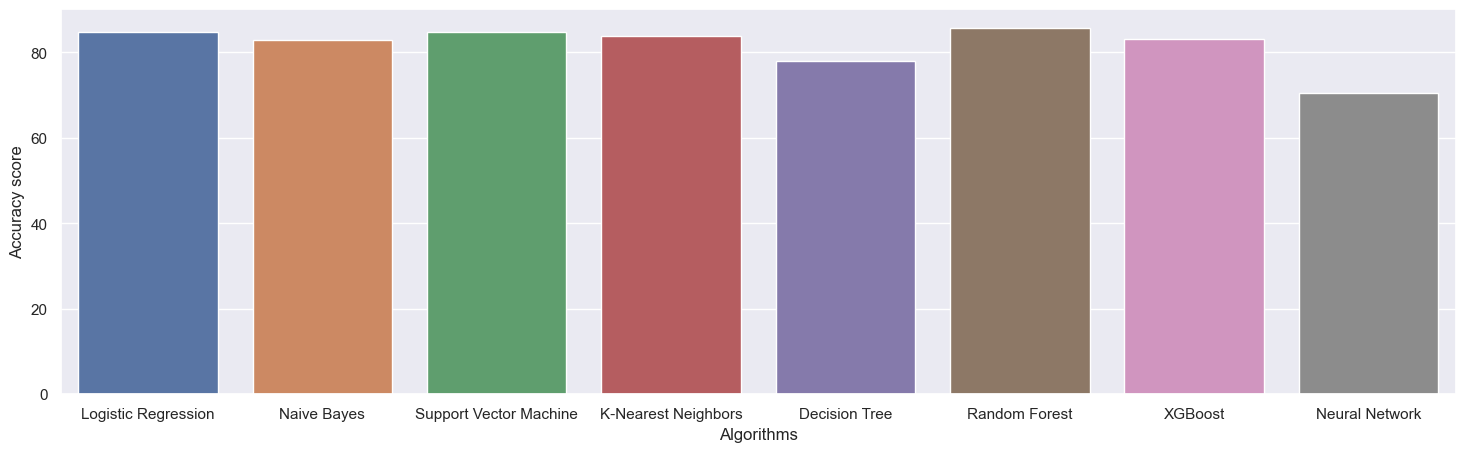

In [86]:
sns.set(rc={'figure.figsize':(18,5)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)

In [112]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_lr = confusion_matrix(Y_test, Y_pred_lr)
cm_nb = confusion_matrix(Y_test, Y_pred_nb)
cm_svm = confusion_matrix(Y_test, Y_pred_svm)
cm_knn = confusion_matrix(Y_test, Y_pred_knn)
cm_dt = confusion_matrix(Y_test, Y_pred_dt)
cm_rf = confusion_matrix(Y_test, Y_pred_rf)
cm_xgb = confusion_matrix(Y_test, Y_pred_xgb)


In [113]:
conf_matrix_lr = pd.DataFrame(data = cm_lr, 
                           columns = ['Predicted: 0', 'Predicted: 1'], 
                           index = ['Actual:0', 'Actual:1'])
conf_matrix_lr

,Predicted: 0,Predicted: 1
Actual:0,699,2
Actual:1,124,2


In [114]:
conf_matrix_nb = pd.DataFrame(data = cm_nb, 
                           columns = ['Predicted: 0', 'Predicted: 1'], 
                           index = ['Actual:0', 'Actual:1'])
conf_matrix_nb

,Predicted: 0,Predicted: 1
Actual:0,663,38
Actual:1,103,23


In [115]:
conf_matrix_svm = pd.DataFrame(data = cm_svm, 
                           columns = ['Predicted: 0', 'Predicted: 1'], 
                           index = ['Actual:0', 'Actual:1'])
conf_matrix_svm

,Predicted: 0,Predicted: 1
Actual:0,701,0
Actual:1,126,0


In [116]:
conf_matrix_knn = pd.DataFrame(data = cm_knn, 
                           columns = ['Predicted: 0', 'Predicted: 1'], 
                           index = ['Actual:0', 'Actual:1'])
conf_matrix_knn

,Predicted: 0,Predicted: 1
Actual:0,684,17
Actual:1,117,9


In [117]:
conf_matrix_dt = pd.DataFrame(data = cm_dt, 
                           columns = ['Predicted: 0', 'Predicted: 1'], 
                           index = ['Actual:0', 'Actual:1'])
conf_matrix_dt

,Predicted: 0,Predicted: 1
Actual:0,603,98
Actual:1,84,42


In [118]:
conf_matrix_rf = pd.DataFrame(data = cm_rf, 
                           columns = ['Predicted: 0', 'Predicted: 1'], 
                           index = ['Actual:0', 'Actual:1'])
print('Accuracy of random forest:', accuracy_score(Y_test, Y_pred_rf))
conf_matrix_rf

Accuracy of random forest: 0.8585247883917775


,Predicted: 0,Predicted: 1
Actual:0,697,4
Actual:1,113,13


In [125]:
conf_matrix_xgb = pd.DataFrame(data = cm_xgb, 
                           columns = ['Predicted: 0', 'Predicted: 1'], 
                           index = ['Actual:0', 'Actual:1'])
conf_matrix_xgb

,Predicted: 0,Predicted: 1
Actual:0,676,25
Actual:1,115,11


In [126]:
sen_nn = 100*513/(513+206)
spe_nn = 100*85/(85+44)

In [127]:
sen_lr = 100*cm_lr[0,0]/(cm_lr[0,0]+cm_lr[0,1])
sen_nb = 100*cm_nb[0,0]/(cm_nb[0,0]+cm_nb[0,1])
sen_svm = 100*cm_svm[0,0]/(cm_svm[0,0]+cm_svm[0,1])
sen_knn = 100*cm_knn[0,0]/(cm_knn[0,0]+cm_knn[0,1])
sen_dt = 100*cm_dt[0,0]/(cm_dt[0,0]+cm_dt[0,1])
sen_rf = 100*cm_rf[0,0]/(cm_rf[0,0]+cm_rf[0,1])
sen_xgb = 100*cm_xgb[0,0]/(cm_xgb[0,0]+cm_xgb[0,1])

In [128]:
spe_lr = 100*cm_lr[1,1]/(cm_lr[1,0]+cm_lr[1,1])
spe_nb = 100*cm_nb[1,1]/(cm_nb[1,0]+cm_nb[1,1])
spe_svm = 100*cm_svm[1,1]/(cm_svm[1,0]+cm_svm[1,1])
spe_knn = 100*cm_knn[1,1]/(cm_knn[1,0]+cm_knn[1,1])
spe_dt = 100*cm_dt[1,1]/(cm_dt[1,0]+cm_dt[1,1])
spe_rf = 100*cm_rf[1,1]/(cm_rf[1,0]+cm_rf[1,1])
spe_xgb = 100*cm_xgb[1,1]/(cm_xgb[1,0]+cm_xgb[1,1])

In [129]:
sen = [sen_lr,sen_nb,sen_svm,sen_knn,sen_dt,sen_rf,sen_xgb,sen_nn]
spe = [spe_lr,spe_nb,spe_svm,spe_knn,spe_dt,spe_rf,spe_xgb,spe_nn]

<Axes: xlabel='Algorithms', ylabel='Sensitivity'>

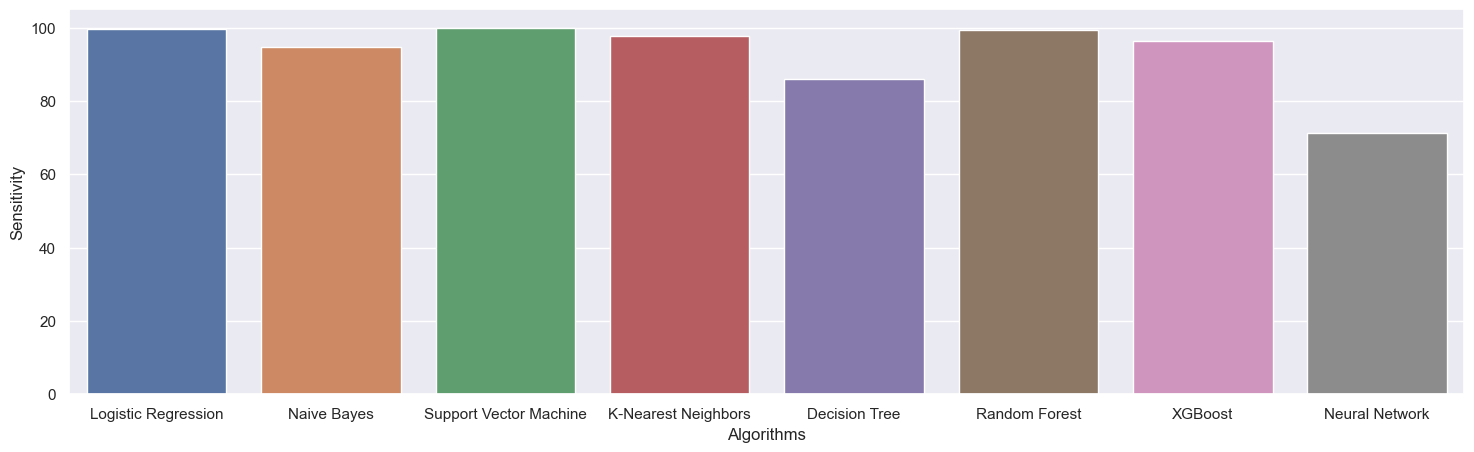

In [130]:
sns.set(rc={'figure.figsize':(18,5)})
plt.xlabel("Algorithms")
plt.ylabel("Sensitivity")
sns.barplot(x=algorithms,y=sen)

<Axes: xlabel='Algorithms', ylabel='specificity'>

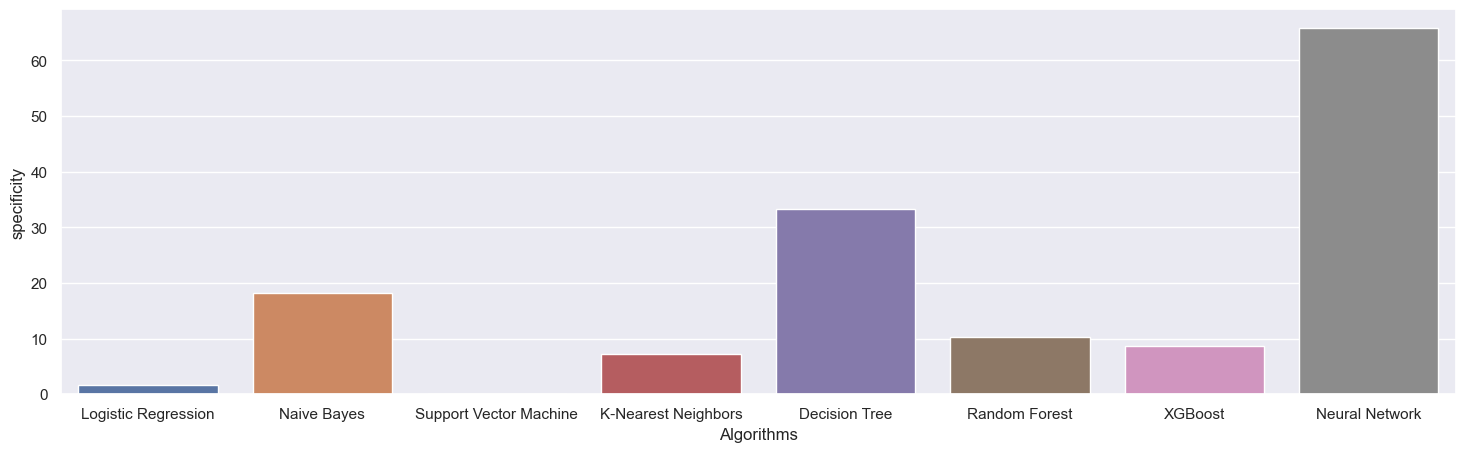

In [131]:
sns.set(rc={'figure.figsize':(18,5)})
plt.xlabel("Algorithms")
plt.ylabel("specificity")
sns.barplot(x=algorithms,y=spe)

In [132]:
spe_nn

65.89147286821705

In [133]:
scores

[84.76, 82.95, 84.76, 83.8, 77.99, 85.85, 83.07, 70.52]

In [134]:
sen

[99.71469329529243,
 94.57917261055634,
 100.0,
 97.57489300998573,
 86.01997146932953,
 99.42938659058488,
 96.4336661911555,
 71.34909596662031]

In [135]:
spe

[1.5873015873015872,
 18.253968253968253,
 0.0,
 7.142857142857143,
 33.333333333333336,
 10.317460317460318,
 8.73015873015873,
 65.89147286821705]

In [140]:
dataset.iloc[3]

male                 0.00
age                 61.00
education            1.00
currentSmoker        1.00
cigsPerDay          30.00
BPMeds               0.00
prevalentStroke      0.00
prevalentHyp         1.00
diabetes             0.00
totChol            225.00
sysBP              150.00
diaBP               95.00
BMI                 28.58
heartRate           65.00
glucose            103.00
TenYearCHD           1.00
Name: 3, dtype: float64

In [141]:
print("The user has a risk of getting coronary heart disease in the next 10 years")

The user has a risk of getting coronary heart disease in the next 10 years
